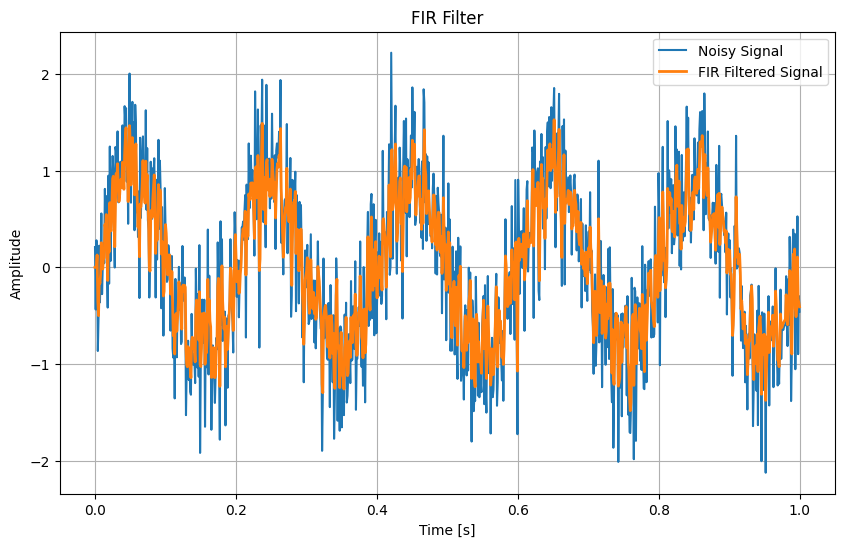

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sinusoidal signal with noise 
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs)
x = np.sin(2 * np.pi * 5 * t) + 0.5 * np.random.randn(len(t))

# FIR Filter Implementation
b_fir = [0.5, 0.3, 0.1]
def fir_filter(x, b):
    M = len(b)
    y = np.zeros(len(x))
    for n in range(M, len(x)):
        y[n] = np.dot(b, x[n-M+1:n+1][::-1])
    return y

y_fir = fir_filter(x, b_fir)

plt.figure(figsize=(10, 6))
plt.plot(t, x, label="Noisy Signal")
plt.plot(t, y_fir, label="FIR Filtered Signal", linewidth=2)
plt.legend()
plt.title("FIR Filter")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

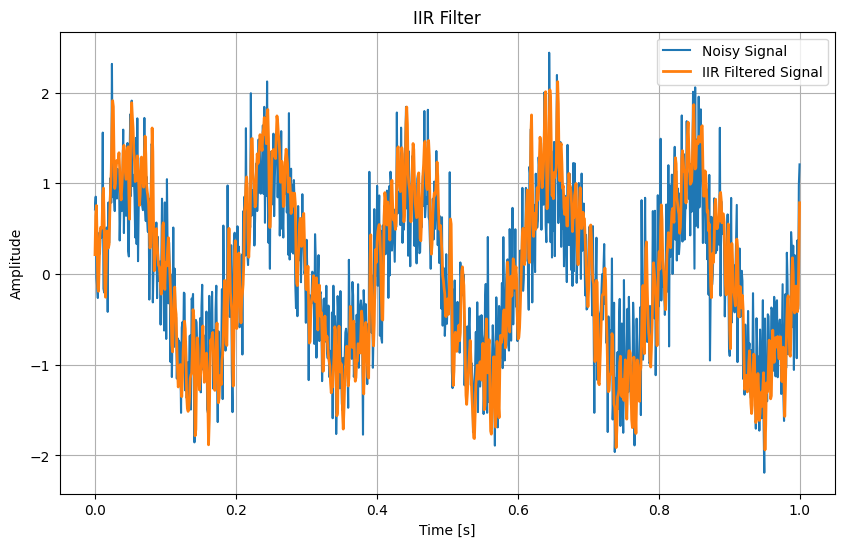

In [13]:
# IIR Filter Implementation
b_iir = [0.3, 0.4, 0.3]
a_iir = [1, -0.4, 0.2]
def iir_filter(x, b, a):
    M = len(b)
    N = len(a) - 1
    y = np.zeros(len(x))

    for n in range(len(x)):
        x_segment = x[max(0, n-M+1):n+1][::-1] 
        b_trimmed = b[-len(x_segment):] 
        y[n] = np.dot(b_trimmed, x_segment)  

        if n > 0:
            y_segment = y[max(0, n-N):n][::-1]  
            a_trimmed = a[1:1+len(y_segment)]  
            y[n] -= np.dot(a_trimmed, y_segment)

    return y


plt.figure(figsize=(10, 6))
plt.plot(t, x, label="Noisy Signal")
plt.plot(t, y_iir, label="IIR Filtered Signal", linewidth=2)
plt.legend()
plt.title("IIR Filter")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

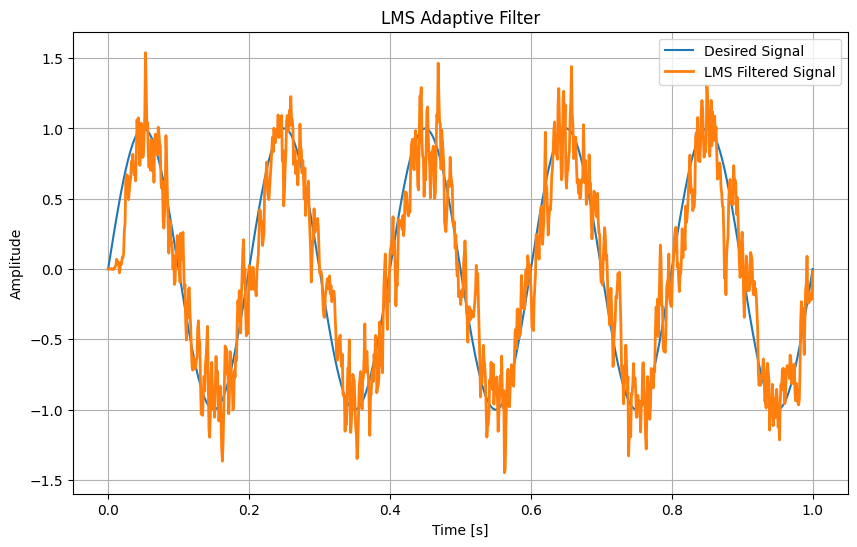

In [11]:
# Adaptive LMS Filter Implementation
def lms_filter(x, d, mu, num_taps):
    n = len(x)
    w = np.zeros(num_taps)
    y = np.zeros(n)
    e = np.zeros(n)
    for i in range(num_taps, n):
        x_segment = x[i-num_taps:i][::-1]
        y[i] = np.dot(w, x_segment)
        e[i] = d[i] - y[i]
        w += mu * e[i] * x_segment
    return y, e, w

d = np.sin(2 * np.pi * 5 * t)  # Oczekiwany sygnał
mu = 0.05  # Współczynnik uczenia
num_taps = 4
y_lms, e, w = lms_filter(x, d, mu, num_taps)

plt.figure(figsize=(10, 6))
plt.plot(t, d, label="Desired Signal")
plt.plot(t, y_lms, label="LMS Filtered Signal", linewidth=2)
plt.legend()
plt.title("LMS Adaptive Filter")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.show()